In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/nyc_311_2020.csv")

C:\Users\Jules\AppData\Local\Temp\ipykernel_5076\2171897424.py:1: DtypeWarning: Columns (20,31,32,34,35,36,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../data/nyc_311_2020.csv")


In [3]:
data['created_date'] = pd.to_datetime(data['created_date'])
data['closed_date'] = pd.to_datetime(data['closed_date'])

# Task 1

In [40]:
noise_complaints = data[data['complaint_type'].str.contains("Noise")]
noise_complaints['month'] = noise_complaints['created_date'].dt.month
complaints_summary = noise_complaints.value_counts("complaint_type").reset_index()
display(complaints_summary)

C:\Users\Jules\AppData\Local\Temp\ipykernel_19268\3715310016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  noise_complaints['month'] = noise_complaints['created_date'].dt.month


,complaint_type,count
0,Noise - Residential,306912
1,Noise - Street/Sidewalk,170472
2,Noise - Vehicle,61825
3,Noise - Commercial,31848
4,Noise,31596
5,Noise - Park,6265
6,Noise - Helicopter,5610
7,Noise - House of Worship,419
8,Collection Truck Noise,1


In [41]:
complaints_summary['complaint'] = (complaints_summary['complaint_type']
                                   .apply(lambda x: str.replace(x, "Noise - ", ""))
                                   .apply(lambda x: str.replace(x, "Noise", "Miscellaneous"))
)
complaints_summary = complaints_summary.drop(columns=['complaint_type'])
display(complaints_summary)

,count,complaint
0,306912,Residential
1,170472,Street/Sidewalk
2,61825,Vehicle
3,31848,Commercial
4,31596,Miscellaneous
5,6265,Park
6,5610,Helicopter
7,419,House of Worship
8,1,Collection Truck Miscellaneous


<Axes: xlabel='count', ylabel='complaint'>

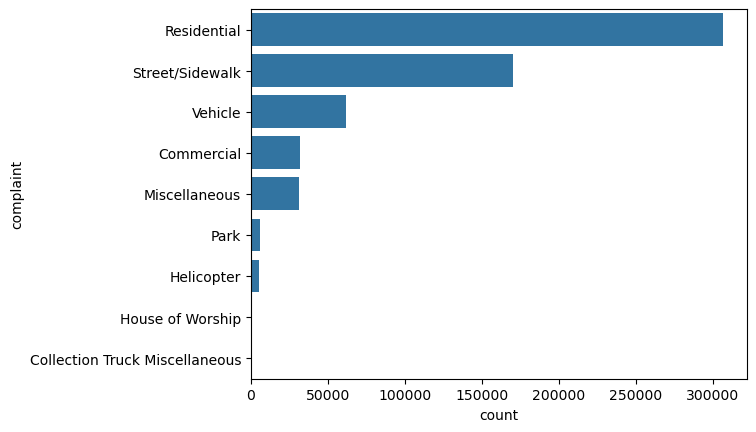

In [29]:
sns.barplot(data = complaints_summary, y = 'complaint', x = 'count', orient='h')

In [50]:
complaints_summary_month = (noise_complaints
                            .groupby('month')['complaint_type']
                            .value_counts()
                            .reset_index()
)
display(complaints_summary_month)

,month,complaint_type,count
0,1,Noise - Residential,18463
1,1,Noise,3761
2,1,Noise - Street/Sidewalk,3096
3,1,Noise - Commercial,3052
4,1,Noise - Vehicle,2495
...,...,...,...
68,9,Noise,3955
69,9,Noise - Park,1631
70,9,Noise - Helicopter,1042
71,9,Noise - House of Worship,65


In [92]:
complaints_summary_month = (noise_complaints[['unique_key', 'month', 'complaint_type']]
                            .groupby(['month', 'complaint_type'])
                            .size()
                            .unstack(fill_value=0)
                            .reset_index())
complaints_summary_month[list(complaints_summary_month.columns[1:])] = (complaints_summary_month[list(complaints_summary_month.columns[1:])]
                                                                        .apply(lambda row: row / sum(row), axis=1))
display(complaints_summary_month)

complaint_type,month,Collection Truck Noise,Noise,Noise - Commercial,Noise - Helicopter,Noise - House of Worship,Noise - Park,Noise - Residential,Noise - Street/Sidewalk,Noise - Vehicle
0,1,0.00000,0.118393,0.096075,0.025498,0.000818,0.002015,0.581201,0.097460,0.078541
1,2,0.00000,0.117144,0.094893,0.020129,0.001164,0.001677,0.606121,0.084554,0.074319
2,3,0.00000,0.114628,0.059706,0.009969,0.001236,0.004353,0.582411,0.139214,0.088483
3,4,0.00000,0.061795,0.027227,0.007340,0.001803,0.006604,0.673423,0.140684,0.081124
4,5,0.00000,0.051360,0.029120,0.005595,0.000757,0.003940,0.552118,0.257867,0.099243
5,6,0.00000,0.035662,0.035466,0.009897,0.000448,0.009328,0.387659,0.423731,0.097808
6,7,0.00000,0.030984,0.061693,0.005221,0.000374,0.013339,0.438263,0.346599,0.103527
7,8,0.00000,0.030266,0.049050,0.005227,0.000349,0.015332,0.483970,0.305489,0.110318
8,9,0.00001,0.040212,0.061005,0.010594,0.000661,0.016583,0.490885,0.261304,0.118746


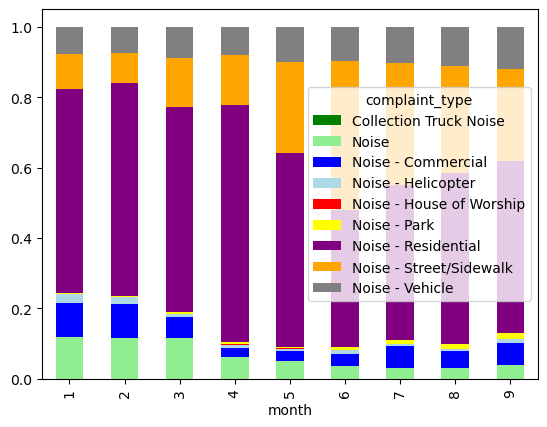

In [96]:
colours = ['green', 'lightgreen', 'blue', 'lightblue', 'red', 'yellow', 'purple', 'orange', 'gray']
complaints_summary_month.set_index('month').plot(kind='bar', stacked=True, color=colours) ## Plot
plt.savefig("../plots/task1_plot.png")

# Task 2

In [24]:
complaint_type_summary = data.value_counts('complaint_type').reset_index()
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#    display(complaint_type_summary)

In [18]:
sanitation_complaints = data[data['complaint_type'] == "UNSANITARY CONDITION"]

In [20]:
sanitation_complaints.value_counts('descriptor')

descriptor
PESTS                        17467
MOLD                          9465
GARBAGE/RECYCLING STORAGE     7388
SEWAGE                         968
Name: count, dtype: int64

In [32]:
data['pest_complaint'] = ((data['complaint_type'] == "UNSANITARY CONDITION") & (data['descriptor'] == "PESTS"))

location_type
Street/Sidewalk                 485494
Residential Building/House      323793
RESIDENTIAL BUILDING            223814
Street                          165950
Store/Commercial                 75738
                                 ...  
Theater                              1
Correctional Facility - City         1
Catering Hall                        1
Nursing Home                         1
Dentist's Office                     1
Name: count, Length: 135, dtype: int64

In [40]:
pest_complaints_summary = (data
                           .groupby('location_type')
                           .agg({'pest_complaint': 'mean'})
                           .reset_index()
                           .query('pest_complaint > 0'))
display(pest_complaints_summary)

,location_type,pest_complaint
83,RESIDENTIAL BUILDING,0.078042
